In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
#from scipy import stats
#from scipy.optimize import curve_fit

In [2]:
suicide = pd.read_csv('county-suicide.csv')
suicide2 = suicide.groupby(['County', 'County Code','Population'], as_index=False).agg({'Deaths':'sum'})
suicide2['Rate'] = suicide2['Deaths'] / suicide2['Population'] * 100000
suicide2.head()

,County,County Code,Population,Deaths,Rate
0,"Ada County, ID",16001.0,469966.0,86.0,18.299196
1,"Adams County, CO",8001.0,511868.0,79.0,15.433666
2,"Adams County, PA",42001.0,102811.0,12.0,11.671903
3,"Aiken County, SC",45003.0,169401.0,25.0,14.757882
4,"Alachua County, FL",12001.0,269956.0,33.0,12.224214


In [3]:
elevation = pd.read_csv('county-elevation.csv')
elevation2 = elevation[['NAME','STATE_NAME','FIPS','MEAN']]
elevation2.head()

,NAME,STATE_NAME,FIPS,MEAN
0,Lauderdale,Alabama,1077,194.816228
1,Limestone,Alabama,1083,210.340331
2,Madison,Alabama,1089,242.428242
3,Jackson,Alabama,1071,320.258370
4,Colbert,Alabama,1033,179.550851


In [4]:
density = pd.read_csv('county-popdensity.csv')
density2 = density[['GEOID','NAME','State','B01001_calc_PopDensity']]
density2.head()

,GEOID,NAME,State,B01001_calc_PopDensity
0,1001,Autauga County,Alabama,35.853419
1,1003,Baldwin County,Alabama,50.541504
2,1005,Barbour County,Alabama,11.247981
3,1007,Bibb County,Alabama,13.973114
4,1009,Blount County,Alabama,34.515816


In [5]:
suicide_elevation = pd.merge(suicide2, elevation2, left_on='County Code', right_on='FIPS')
ele=suicide_elevation.rename(columns={"Rate": "Suicide Rate", "MEAN": "Mean County Elevation"})
ele.head()

,County,County Code,Population,Deaths,Suicide Rate,NAME,STATE_NAME,FIPS,Mean County Elevation
0,"Ada County, ID",16001.0,469966.0,86.0,18.299196,Ada,Idaho,16001,936.833984
1,"Adams County, CO",8001.0,511868.0,79.0,15.433666,Adams,Colorado,8001,1550.924198
2,"Adams County, PA",42001.0,102811.0,12.0,11.671903,Adams,Pennsylvania,42001,230.943560
3,"Aiken County, SC",45003.0,169401.0,25.0,14.757882,Aiken,South Carolina,45003,110.527337
4,"Alachua County, FL",12001.0,269956.0,33.0,12.224214,Alachua,Florida,12001,31.285043


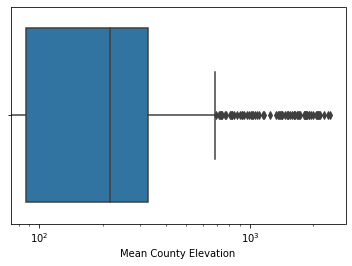

In [6]:
sns.boxplot(data=ele, x='Mean County Elevation')
plt.xscale('log')

y = 0.00458401539515684x + 9.855493579526161


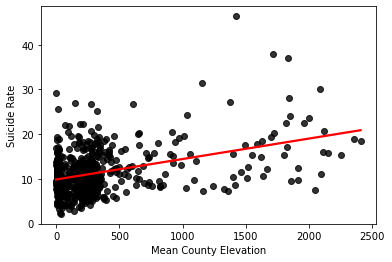

In [17]:
p = sns.regplot(data=ele, x='Mean County Elevation', y='Suicide Rate', ci=None, 
           scatter_kws={"color": "black"}, line_kws={"color": "red"})

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print('y = ' + str(slope) + 'x + ' + str(intercept))

In [18]:
suicide_density = pd.merge(suicide2, density2, left_on='County Code', right_on='GEOID')
pod = suicide_density.rename(columns={"Rate": "Suicide Rate", "B01001_calc_PopDensity": "County Population Density"})
pod.head()

,County,County Code,Population,Deaths,Suicide Rate,GEOID,NAME,State,County Population Density
0,"Ada County, ID",16001.0,469966.0,86.0,18.299196,16001,Ada County,Idaho,163.707537
1,"Adams County, CO",8001.0,511868.0,79.0,15.433666,8001,Adams County,Colorado,164.575308
2,"Adams County, PA",42001.0,102811.0,12.0,11.671903,42001,Adams County,Pennsylvania,75.933457
3,"Aiken County, SC",45003.0,169401.0,25.0,14.757882,45003,Aiken County,South Carolina,60.199841
4,"Alachua County, FL",12001.0,269956.0,33.0,12.224214,12001,Alachua County,Florida,116.112210


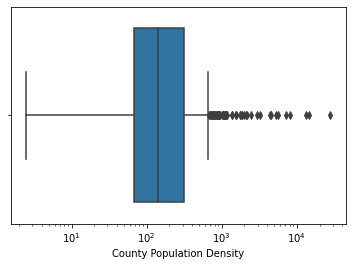

In [19]:
sns.boxplot(data=pod, x='County Population Density')
plt.xscale('log')

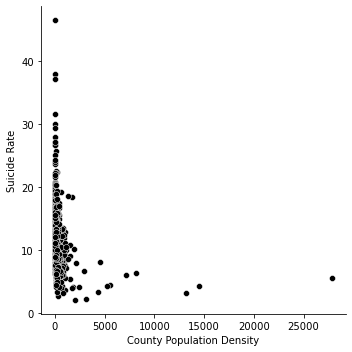

In [23]:
sns.relplot(data=pod, x='County Population Density', y='Suicide Rate', ci=None,
           color='black')

y = -0.008040688554070996x + 13.34133366617574


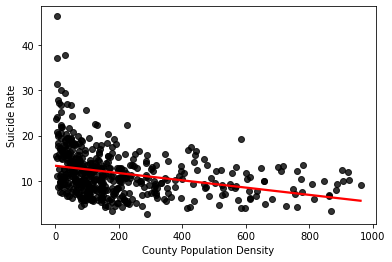

In [22]:
q = sns.regplot(data=pod[pod['County Population Density']<1000], 
           x='County Population Density', y='Suicide Rate', ci=None,
           scatter_kws={"color": "black"}, line_kws={"color": "red"})

slope, intercept, r, q, sterr = scipy.stats.linregress(x=q.get_lines()[0].get_xdata(),
                                                       y=q.get_lines()[0].get_ydata())
print('y = ' + str(slope) + 'x + ' + str(intercept))